In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
R_Wine = pd.read_csv(r"C:\Data Analysis - Files\Wine Dataset\winequality-red.csv", sep= ';') 
W_wine = pd.read_csv(r"C:\Data Analysis - Files\Wine Dataset\winequality-white.csv", sep= ';')
# W_wine.info()
# W_wine.head()
# W_wine.tail()
R_Wine.info()
R_Wine.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [47]:
#create new column with name 'quality label' where values are in catagory low, med and high
# R_Wine['quality label']= R_Wine['quality'].apply(lambda value : 'low'
#                                                  if value <= 5 else 'medium'
#                                                  if value <= 7 else 'high')

R_Wine ['quality label'] = pd.cut(R_Wine['quality'],bins=[0,5,7,10],labels=['low','medium','high'],right=True)

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
R_Wine['quality label']=pd.Categorical(R_Wine['quality label'], categories= ['low', 'medium', 'high'], ordered= True )
R_Wine['quality label']
#R_Wine.info()

# W_wine['quality label']= W_wine['quality'].apply(lambda value : 'low'
#                                                  if value <= 5 else 'medium'
#                                                  if value <= 7 else 'high')

W_wine ['quality label'] = pd.cut(W_wine['quality'],bins=[0,5,7,10],labels=['low','medium','high'],right=True)
W_wine ['quality label'] = pd.Categorical(W_wine['quality label'], categories = ['low', 'medium', 'high'], ordered= True)
W_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         4898 non-null   float64 
 1   volatile acidity      4898 non-null   float64 
 2   citric acid           4898 non-null   float64 
 3   residual sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free sulfur dioxide   4898 non-null   float64 
 6   total sulfur dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   int64   
 12  quality label         4898 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB


In [48]:
# now drop some cloumns
#R_Wine = R_Wine.drop(['fixed acidity', 'citric acid','chlorides', 'free sulfur dioxide','density','pH'],axis=1)
#W_wine = W_wine.drop(['fixed acidity', 'citric acid','chlorides', 'free sulfur dioxide','density','pH'],axis=1)

In [49]:
# combine red and white wind data side by side
RW_Wine = pd.concat([R_Wine.describe(),W_wine.describe()], axis = 1,keys=["Red Wine Stats","White Wine Stats"])
RW_Wine.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Red Wine Stats, fixed acidity)           8 non-null      float64
 1   (Red Wine Stats, volatile acidity)        8 non-null      float64
 2   (Red Wine Stats, citric acid)             8 non-null      float64
 3   (Red Wine Stats, residual sugar)          8 non-null      float64
 4   (Red Wine Stats, chlorides)               8 non-null      float64
 5   (Red Wine Stats, free sulfur dioxide)     8 non-null      float64
 6   (Red Wine Stats, total sulfur dioxide)    8 non-null      float64
 7   (Red Wine Stats, density)                 8 non-null      float64
 8   (Red Wine Stats, pH)                      8 non-null      float64
 9   (Red Wine Stats, sulphates)               8 non-null      float64
 10  (Red Wine Stats, alcohol)                

In [50]:
##findings

# mean value of sulfates and volatile acidity is higher in red wine than white wine
# mean value of residual suger is higher in white wine than red wine
# mean value of total sulfur dioxide is higher in white wine than red wine

In [51]:
## adding two data below each other and to recognise added last column with color of rspective data (for hue)
R_Wine['wine type'] = 'red'
W_wine['wine type'] = 'white'

RW_Wine = pd.concat([R_Wine,W_wine], ignore_index=True)
#RW_Wine ['wine type'] = pd.Categorical(RW_Wine['wine type'])

RW_Wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  quality label         6497 non-null   category
 13  wine type             6497 non-null   object  
dtypes: category(1), float64(11), int64(1), object(1)
memory 

Text(0.5, 1.0, 'Red and White Wine data distribustion')

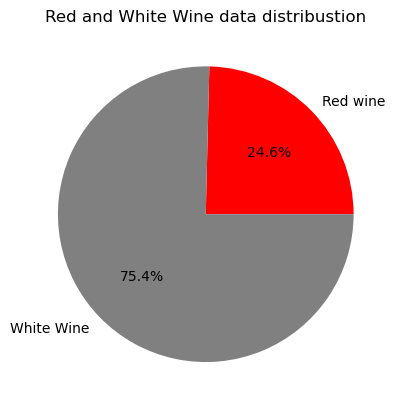

In [52]:
# pie chart
count_redwine = R_Wine.shape[0]
count_Whitewine = W_wine.shape[0]
Sizes = [count_redwine,count_Whitewine]
labels = ['Red wine', 'White Wine']
custom_palette = ['red', 'gray']
plt.pie(Sizes,labels=labels , colors= custom_palette, autopct = '%1.1f%%', ) # %1.1f --> for one digit after the number and %% for % sign
plt.title ('Red and White Wine data distribustion')


Text(0.5, 1.0, 'Count of White Wine')

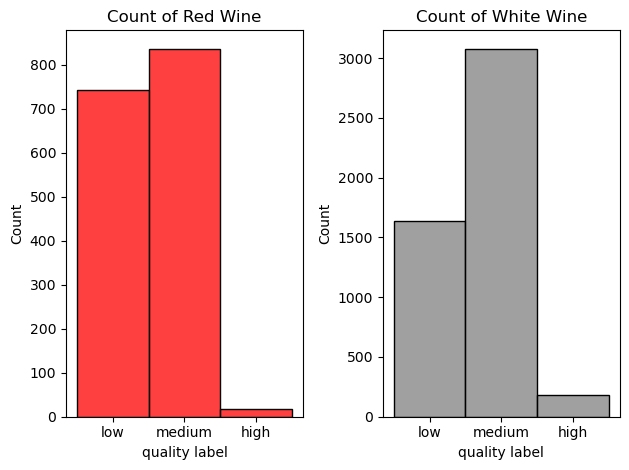

In [53]:
# combination of matplot and seaborn - plot here seprate graph for red and white wine from differentr data


plt.subplot(1,2,1)
sns.histplot(data=R_Wine, x='quality label', color='red')
#plt. ylim (0,3500)
plt.title ('Count of Red Wine')
#plt.suptitle("red", x=0.60, y=1.0)
plt.subplot(1,2,2)
sns.histplot(data=W_wine, x='quality label', color='gray')
#plt. ylim (0,3500)
#plt.suptitle("white", x=0.30, y=1.0)
plt.tight_layout()
plt.title ('Count of White Wine')



Text(0.5, 1.0, 'Red and White wine count vs quality label')

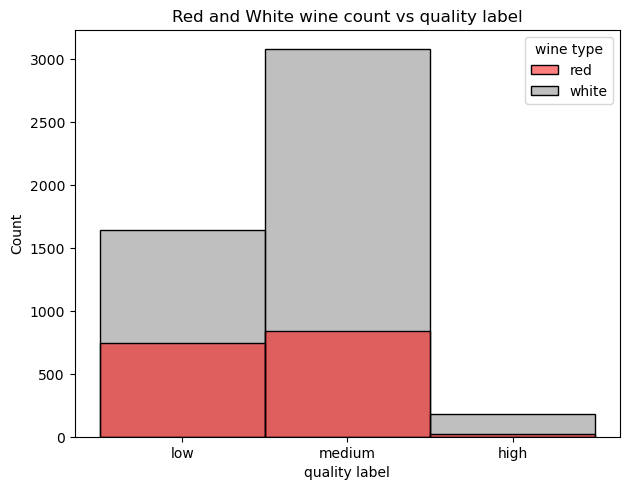

In [54]:
## plot here combine graph for red and white wine
#RW_Wine.map(plt.hist, 'quality label' )

custom_palette = ['red', 'gray'] ## change hue color. here we define and need to call below line. 
sns.histplot(data= RW_Wine, x= 'quality label', hue= 'wine type', palette=custom_palette)
#plt.suptitle ('Red and White Wine Quality label Vs Count')
plt.tight_layout()
plt.title ('Red and White wine count vs quality label')


Text(0.5, 1.0, 'Alcohol contain Vs quality Label')

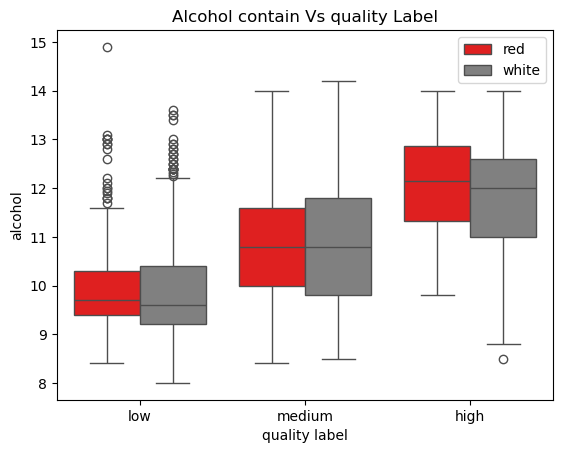

In [55]:
# box plot
custom_palette = ['red', 'gray']
quality_order = ["low","medium", "high"]
sns.boxplot(data = RW_Wine , x= 'quality label',y= 'alcohol', hue ='wine type', palette=custom_palette, order=quality_order)
plt.legend(loc = 1)
plt.title ('Alcohol contain Vs quality Label')
#sns.lmplot(data = RW_Wine , x = 'quality label', y= 'alcohol', row = 'wine type')

Text(0.5, 1.0, 'residual sugar Vs quality label')

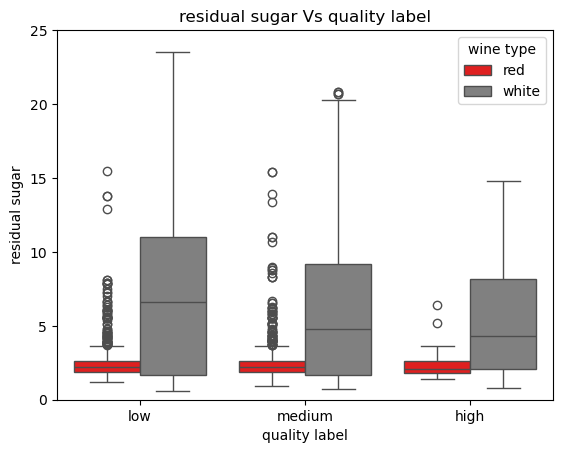

In [56]:
sns.boxplot(data = RW_Wine , x= 'quality label',y= 'residual sugar', hue ='wine type', palette=custom_palette, order=quality_order)
plt.ylim (0,25)
plt.title ('residual sugar Vs quality label')

<Axes: xlabel='quality label', ylabel='citric acid'>

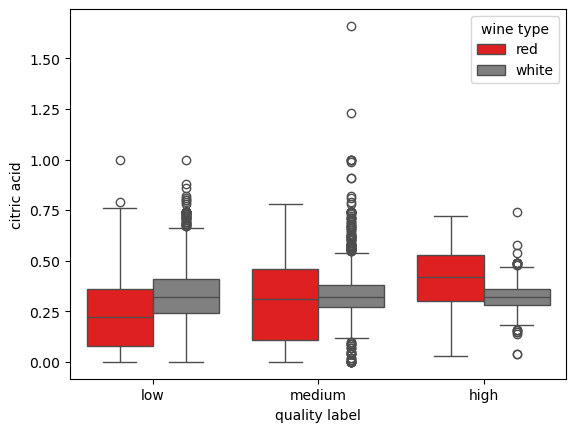

In [57]:
sns.boxplot(data = RW_Wine , x= 'quality label',y= 'citric acid', hue ='wine type', palette=custom_palette, order=quality_order)

<Axes: xlabel='quality label', ylabel='pH'>

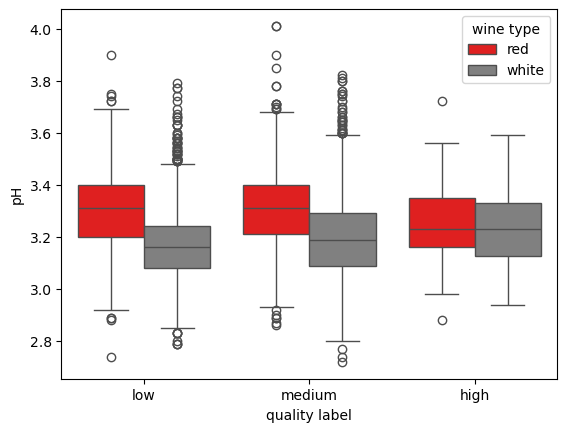

In [58]:
sns.boxplot(data = RW_Wine , x= 'quality label',y= 'pH', hue ='wine type', palette=custom_palette, order=quality_order)

(0.0, 150.0)

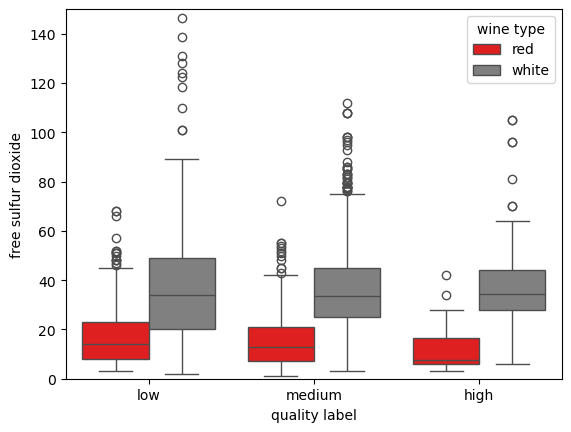

In [59]:
sns.boxplot(data = RW_Wine , x= 'quality label',y= 'free sulfur dioxide', hue ='wine type', palette=custom_palette, order=quality_order)
plt.ylim (0,150)

Text(0.5, 1.0, 'density Vs quality label')

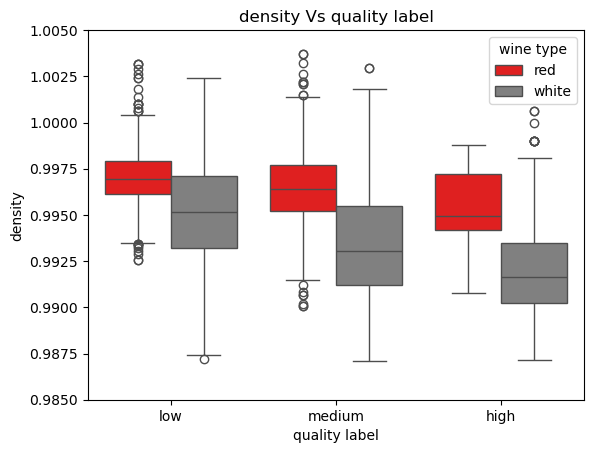

In [60]:
sns.boxplot(data = RW_Wine , x= 'quality label',y= 'density', hue ='wine type', palette=custom_palette, order=quality_order)
plt.ylim(0.985, 1.005)
plt.title ('density Vs quality label')

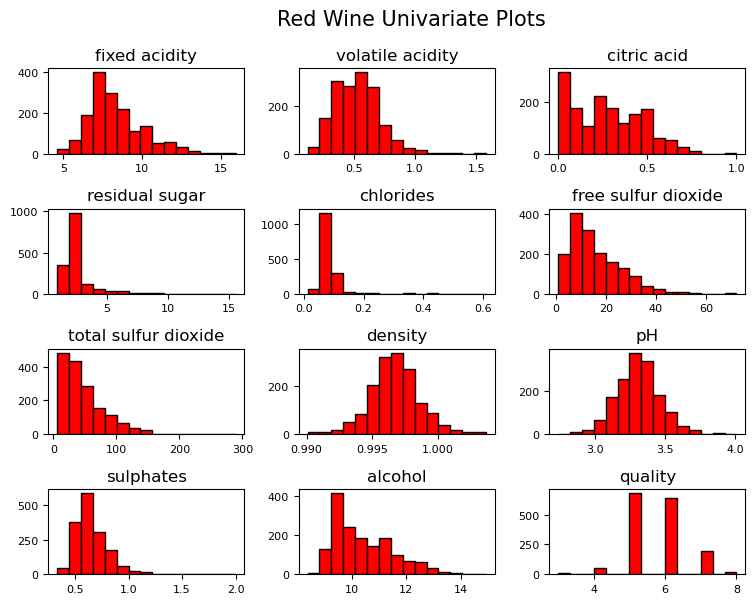

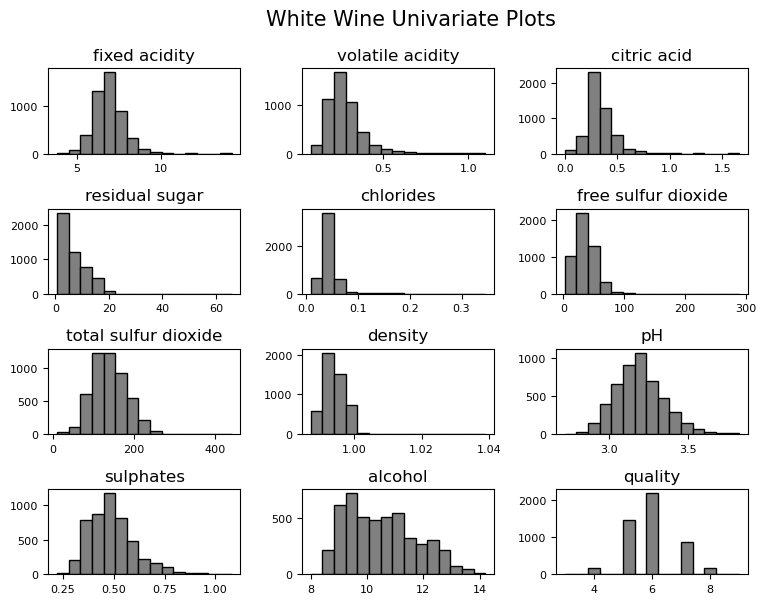

In [61]:
## both wines all graphs (Histogram)

R_Wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)


W_wine.hist(bins=15, color='gray', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
rt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

## red woine more volatile , acidic , less residual sugar, very less sulfur dioxide (approx. 50 % less), bit high density than white wine

C:\Users\Karan\AppData\Local\Temp\ipykernel_13108\1986478302.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


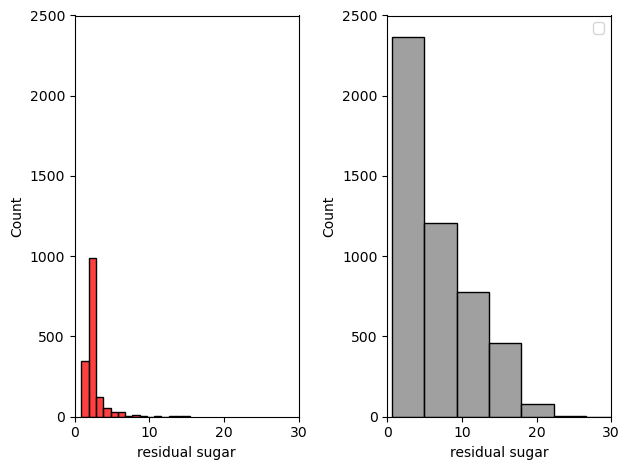

In [62]:
#y_limits = plt.gca().get_ylim()
plt.subplot (1,2,1)
sns.histplot ( x = 'residual sugar', data= R_Wine, bins=15, color='red', edgecolor = 'black', linewidth = 1.0)
plt.ylim (0,2500)
plt.xlim(0,30)
plt.subplot (1,2,2)
sns.histplot (x = 'residual sugar' , data= W_wine , bins=15, color='gray', edgecolor = 'black', linewidth = 1.0)
plt.ylim (0,2500)
plt.xlim(0,30)
plt.legend()
plt.tight_layout()

(0.0, 35.0)

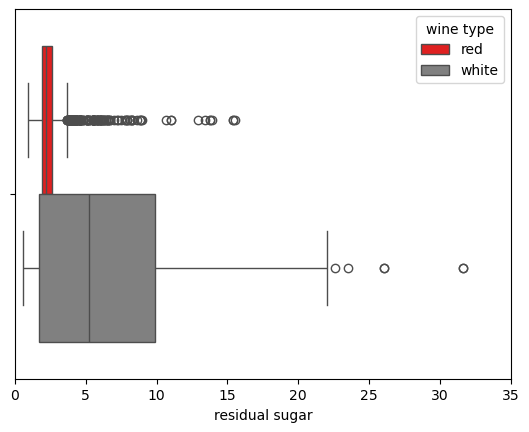

In [63]:
sns.boxplot (x = 'residual sugar', data = RW_Wine , hue ='wine type',palette=custom_palette)
plt.xlim (0,35)

<Axes: xlabel='alcohol', ylabel='sulphates'>

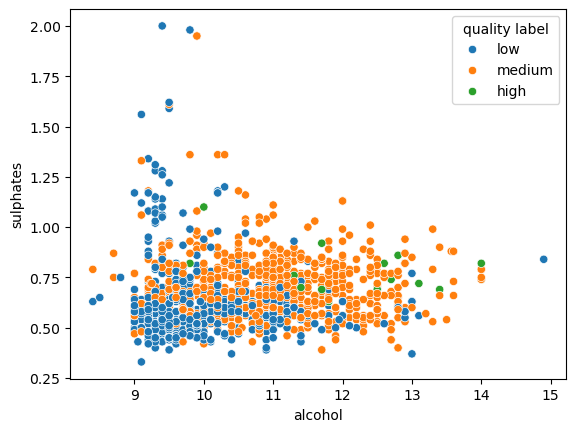

In [64]:
sns.scatterplot(x='alcohol', y= 'sulphates', data=R_Wine,hue='quality label')

<Axes: xlabel='sulphates'>

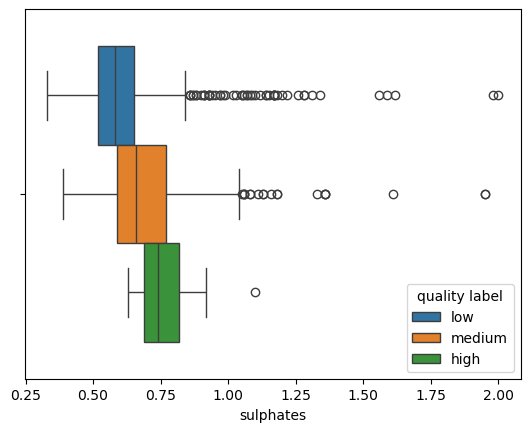

In [65]:
sns.boxplot (data=R_Wine, x='sulphates',hue= 'quality label')

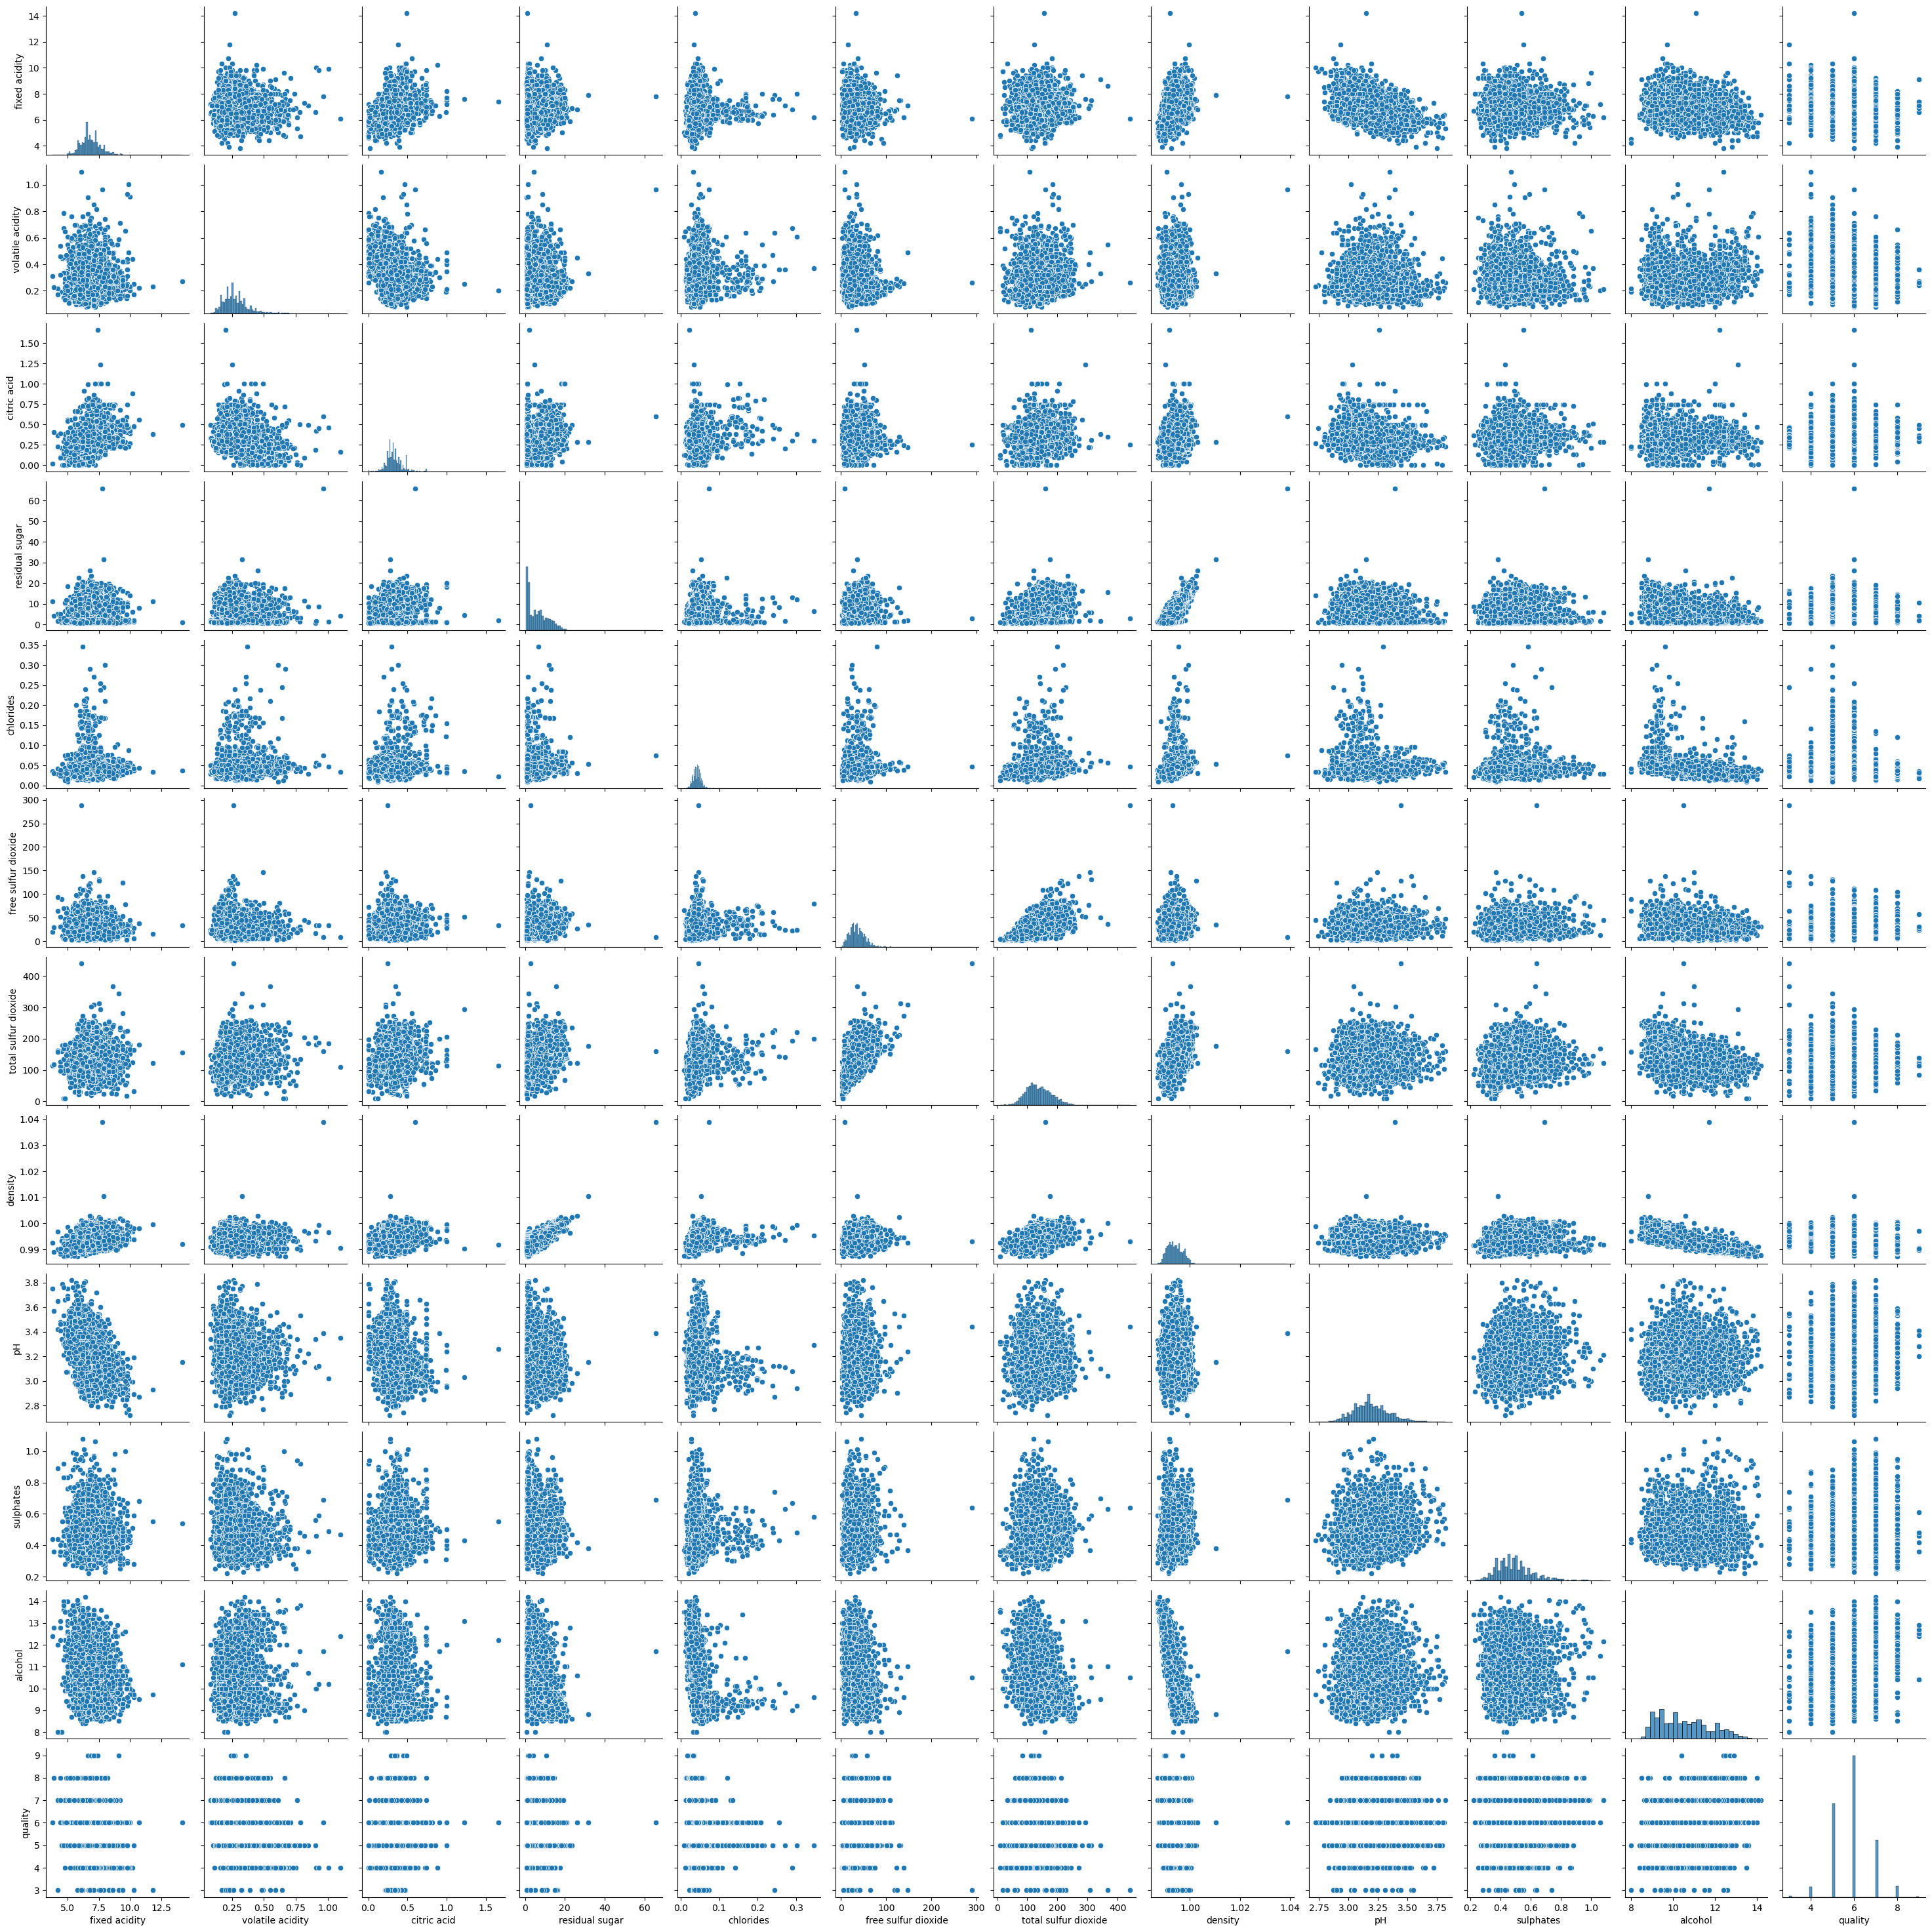

In [66]:
sns.pairplot(data = W_wine)


In [67]:
RW_Wine.corr(numeric_only= True)

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   

                       alcohol   quality  
fixed acidity        -0.095452 -0.076743  
volatile acidity     -0.037640 -0.265699  
citric acid          -0.010493  0.085532  
residual sugar       -0.359415 -0.036980  
chlorides            -0.256916 -0.200666  
free sulfur dioxide  -0.179838  0.055463  
total sulfur dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121248  0.019506  
sulphates            -0.003029  0.038485  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

Text(0.5, 1.0, 'Correlation Matrix of White wine composition')

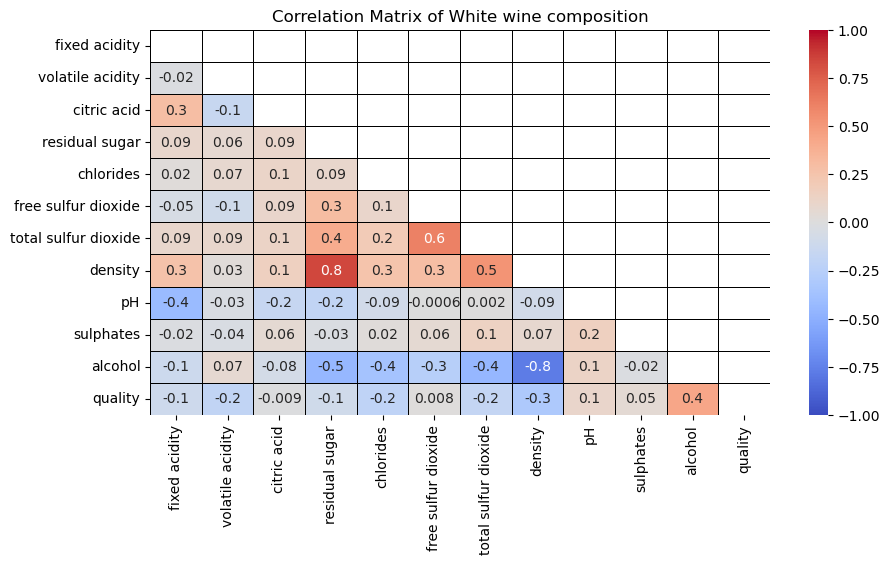

In [68]:
R_matrix = np.triu (W_wine.corr(numeric_only=True)) # to show lower triangle numpy method
#sns.heatmap(R_Wine.corr(), annot=True, mask=R_matrix) # need to use mask to show
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(W_wine.corr(numeric_only=True), annot=True, fmt='.1g', vmin= -1 , vmax= 1 , center= 0,cmap='coolwarm',linewidths= 0.5 , linecolor= 'black',
             cbar=True, mask=R_matrix)
plt.title ('Correlation Matrix of White wine composition')

Text(0.5, 1.0, 'Correlation Matrix of Red wine composition')

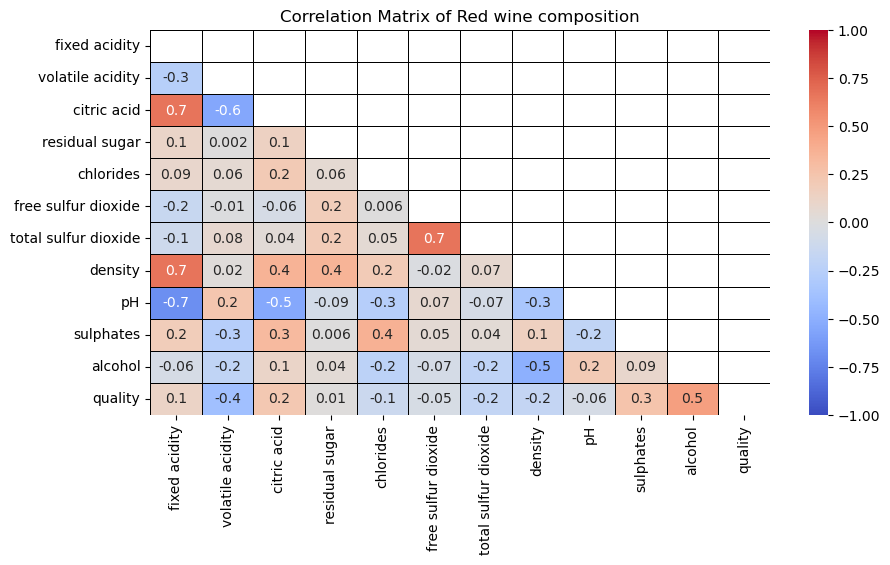

In [69]:
R_matrix = np.triu (R_Wine.corr(numeric_only=True)) # to show lower triangle numpy method
#sns.heatmap(R_Wine.corr(), annot=True, mask=R_matrix) # need to use mask to show
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(R_Wine.corr(numeric_only=True), annot=True, fmt='.1g', vmin= -1 , vmax= 1 , center= 0,cmap='coolwarm',linewidths= 0.5 , linecolor= 'black',
             cbar=True, mask=R_matrix)
plt.title ('Correlation Matrix of Red wine composition')

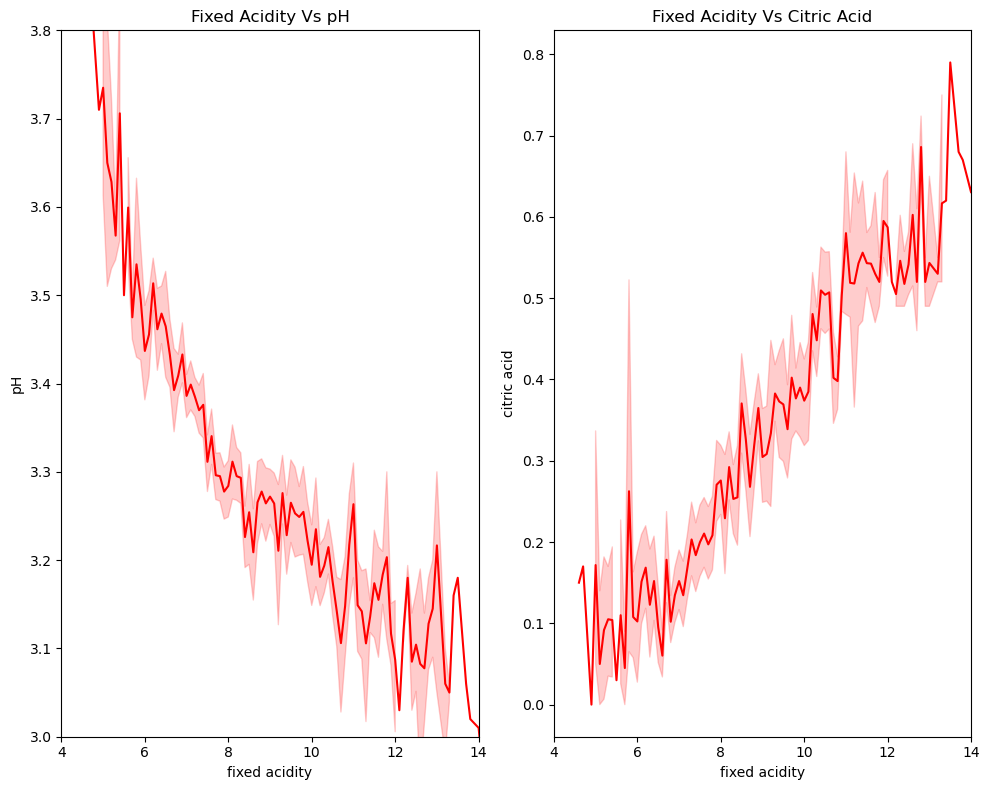

In [70]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.lineplot(x='fixed acidity' , y= 'pH',data=R_Wine, color='red')
plt.ylim(3,3.8)
plt.xlim (4,14)
plt.title ('Fixed Acidity Vs pH' )
plt.subplot(1,2,2)
sns.lineplot(x='fixed acidity', y='citric acid', data=R_Wine, color = 'red')
plt.xlim (4,14)
plt.title ('Fixed Acidity Vs Citric Acid' )
plt.tight_layout()

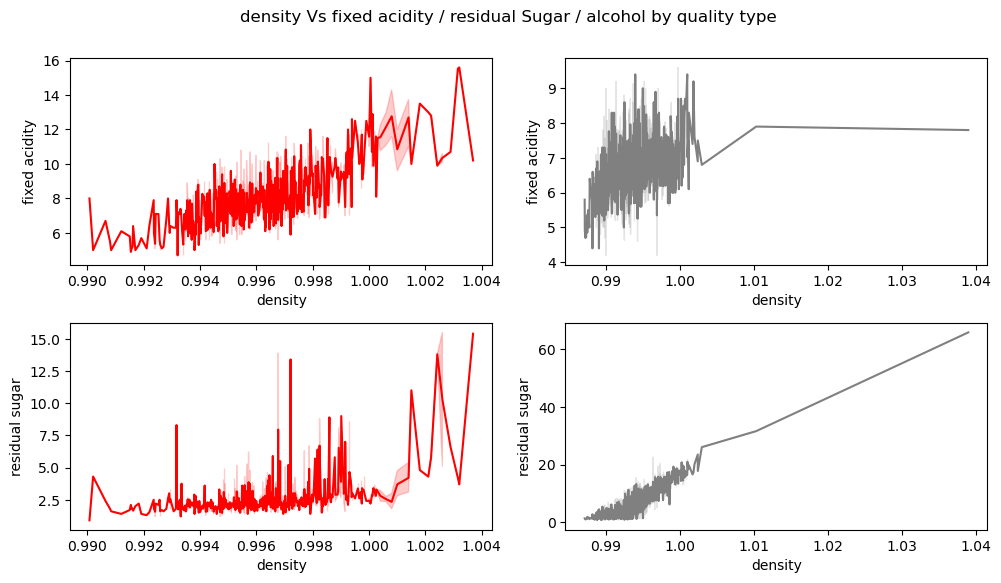

In [71]:
## density Vs fixed acidity / residual Sugar / alcohol
#sns.catplot (x= 'fixed acidity', y= 'citric acid', data=RW_Wine, kind='bar', col='wine type')
plt.figure(figsize=(10,8))
plt.subplot(3,2,1)
sns.lineplot( x = 'density', y = 'fixed acidity', data = R_Wine, color = 'red')
plt.subplot(3,2,2)
sns.lineplot( x = 'density', y = 'fixed acidity', data = W_wine, color = 'gray')


plt.subplot(3,2,3)
sns.lineplot( x = 'density', y = 'residual sugar', data = R_Wine, color = 'red')
plt.subplot(3,2,4)
sns.lineplot( x = 'density', y = 'residual sugar', data = W_wine, color = 'gray')

#plt.subplot(3,2,5)
#sns.lineplot( x = 'density', y = 'alcohol', data = R_Wine, color = 'red')
#plt.subplot(3,2,6)
#sns.lineplot( x = 'density', y = 'alcohol', data = W_wine, color = 'gray')

plt.suptitle ('density Vs fixed acidity / residual Sugar / alcohol by quality type', x=0.50 , y =1)
plt.tight_layout()

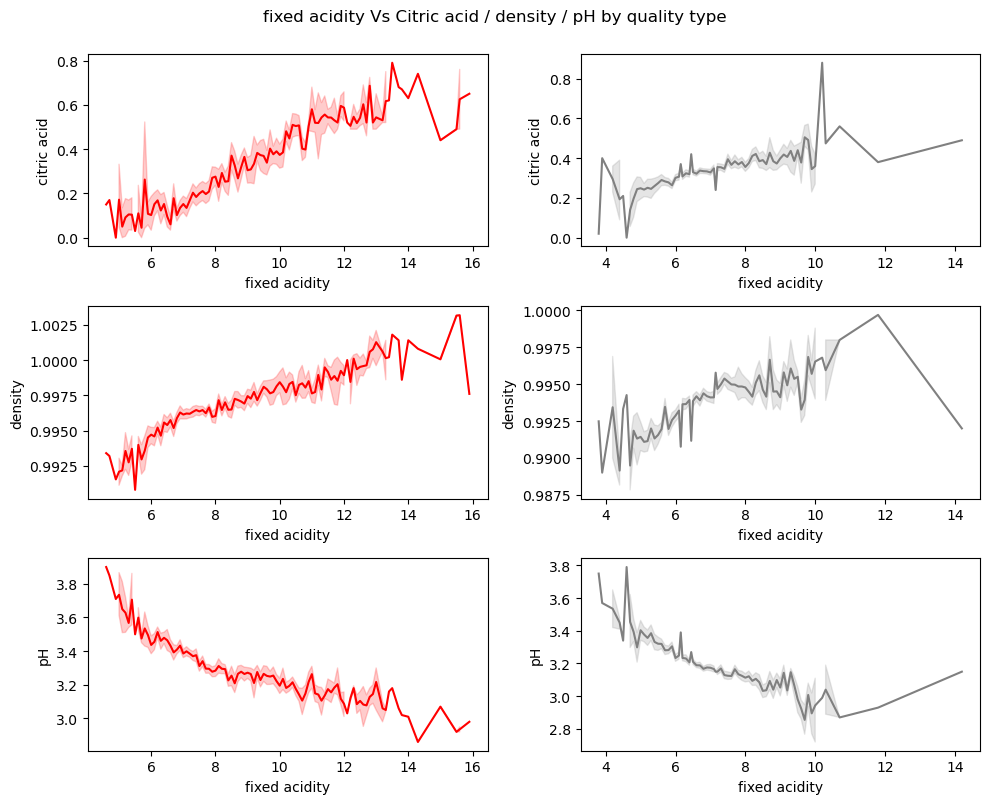

In [72]:
## Fixed acidity Vs Citric Acid
#sns.catplot (x= 'fixed acidity', y= 'citric acid', data=RW_Wine, kind='bar', col='wine type')
plt.figure(figsize=(10,8))
plt.subplot(3,2,1)

sns.lineplot( x = 'fixed acidity', y = 'citric acid', data = R_Wine, color = 'red')
plt.subplot(3,2,2)
sns.lineplot( x = 'fixed acidity', y = 'citric acid', data = W_wine, color = 'gray')


plt.subplot(3,2,3)
sns.lineplot( x = 'fixed acidity', y = 'density', data = R_Wine, color = 'red')
plt.subplot(3,2,4)
sns.lineplot( x = 'fixed acidity', y = 'density', data = W_wine, color = 'gray')

plt.subplot(3,2,5)
sns.lineplot( x = 'fixed acidity', y = 'pH', data = R_Wine, color = 'red')
plt.subplot(3,2,6)
sns.lineplot( x = 'fixed acidity', y = 'pH', data = W_wine, color = 'gray')

plt.suptitle ('fixed acidity Vs Citric acid / density / pH by quality type', x=0.50 , y =1)
plt.tight_layout()
plt.show()

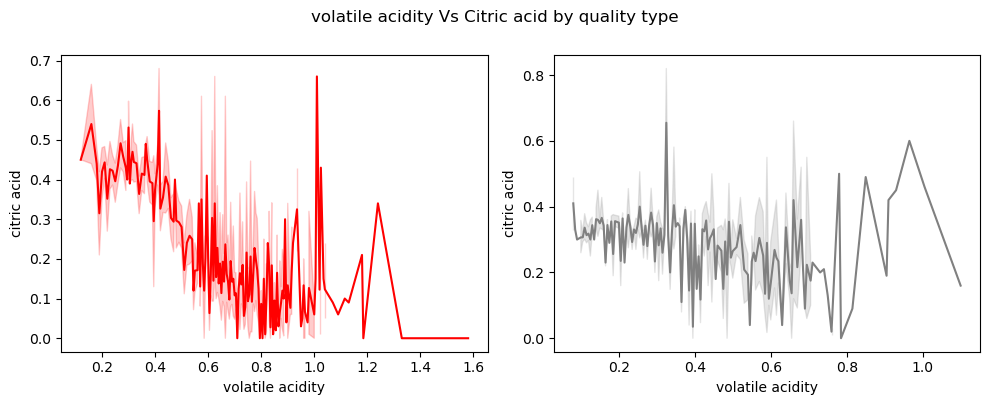

In [73]:
## volatile acidity vs citric acid

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.lineplot( x = 'volatile acidity', y = 'citric acid', data = R_Wine, color = 'red')
plt.subplot(1,2,2)
sns.lineplot( x = 'volatile acidity', y = 'citric acid', data = W_wine, color = 'gray')

plt.suptitle ('volatile acidity Vs Citric acid by quality type', x=0.50 , y =1)
plt.tight_layout()
plt.show()


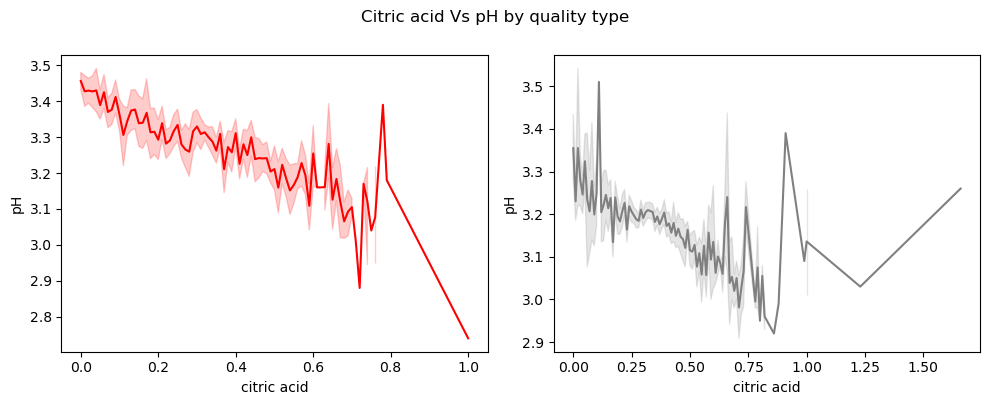

In [74]:
## citric acid Vs pH

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.lineplot( x = 'citric acid', y = 'pH', data = R_Wine, color = 'red')
plt.subplot(1,2,2)
sns.lineplot( x = 'citric acid', y = 'pH', data = W_wine, color = 'gray')

plt.suptitle ('Citric acid Vs pH by quality type', x=0.50 , y =1)
plt.tight_layout()
plt.show()

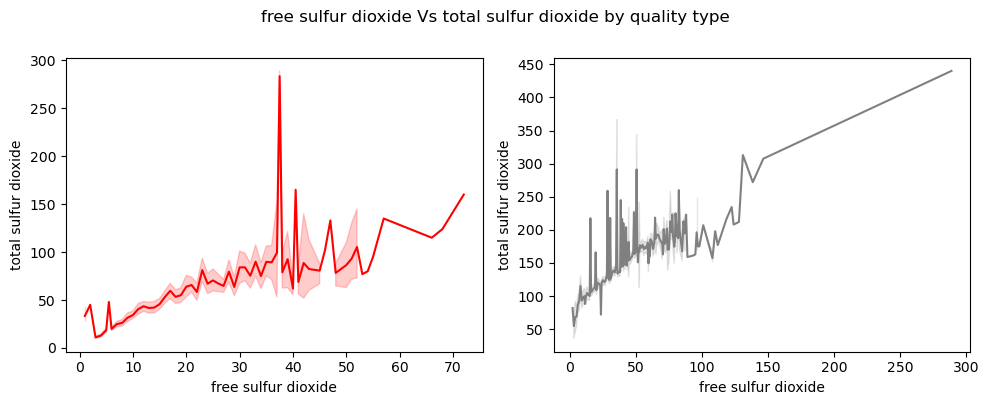

In [75]:
## free sulfur dioxide Vs total sulfur dioxide

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.lineplot( x = 'free sulfur dioxide', y = 'total sulfur dioxide', data = R_Wine, color = 'red')
plt.subplot(1,2,2)
sns.lineplot( x = 'free sulfur dioxide', y = 'total sulfur dioxide', data = W_wine, color = 'gray')

plt.suptitle ('free sulfur dioxide Vs total sulfur dioxide by quality type', x=0.50 , y =1)
plt.tight_layout()
plt.show()

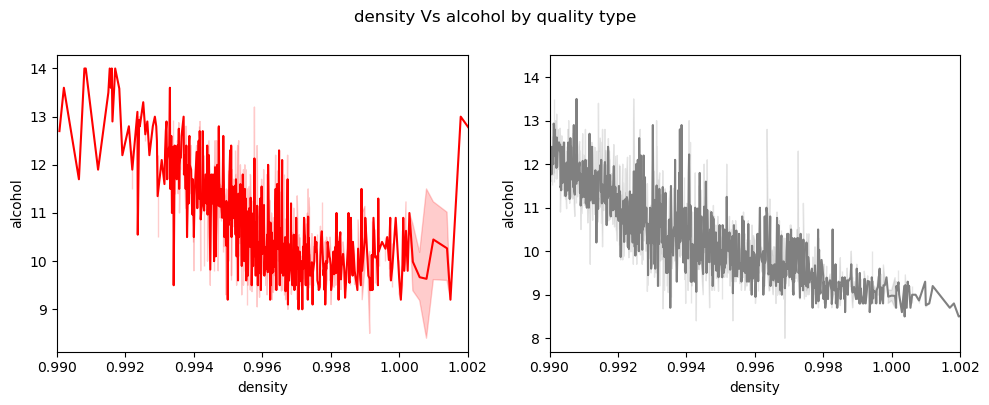

In [76]:
## Density Vs Alcohol

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.lineplot( x = 'density', y = 'alcohol', data = R_Wine, color = 'red')
plt.xlim(0.990,1.002)
plt.subplot(1,2,2)
sns.lineplot( x = 'density', y = 'alcohol', data = W_wine, color = 'gray')
plt.xlim(0.990,1.002)

plt.suptitle ('density Vs alcohol by quality type', x=0.50 , y =1)
plt.tight_layout()
plt.show()

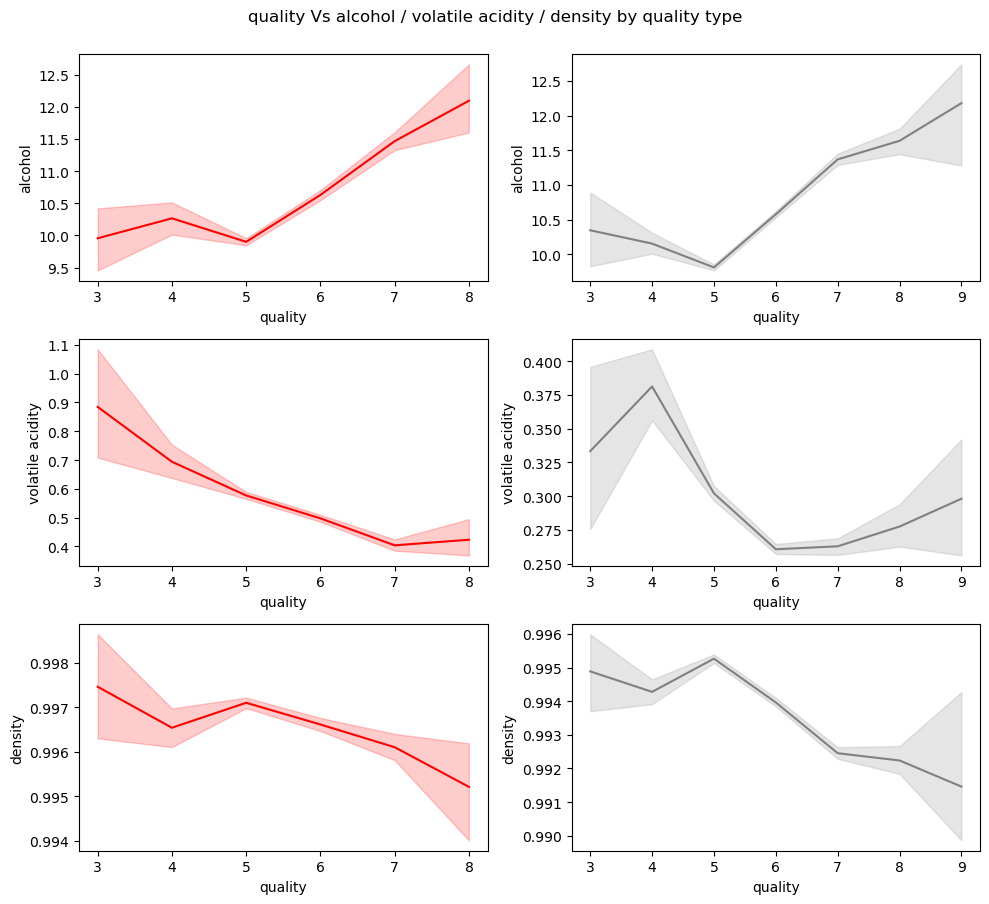

In [77]:
## Quality Vs Alcohol / volatile acidity /  density

plt.figure(figsize=(10,9))
plt.subplot(3,2,1)
sns.lineplot( x = 'quality', y = 'alcohol', data = R_Wine, color = 'red')
plt.subplot(3,2,2)
sns.lineplot( x = 'quality', y = 'alcohol', data = W_wine, color = 'gray')

plt.subplot(3,2,3)
sns.lineplot( x = 'quality', y = 'volatile acidity', data = R_Wine, color = 'red')
plt.subplot(3,2,4)
sns.lineplot( x = 'quality', y = 'volatile acidity', data = W_wine, color = 'gray')

plt.subplot(3,2,5)
sns.lineplot( x = 'quality', y = 'density', data = R_Wine, color = 'red')
plt.subplot(3,2,6)
sns.lineplot( x = 'quality', y = 'density', data = W_wine, color = 'gray')

plt.suptitle ('quality Vs alcohol / volatile acidity / density by quality type', x=0.50 , y =1)
plt.tight_layout()
plt.show()

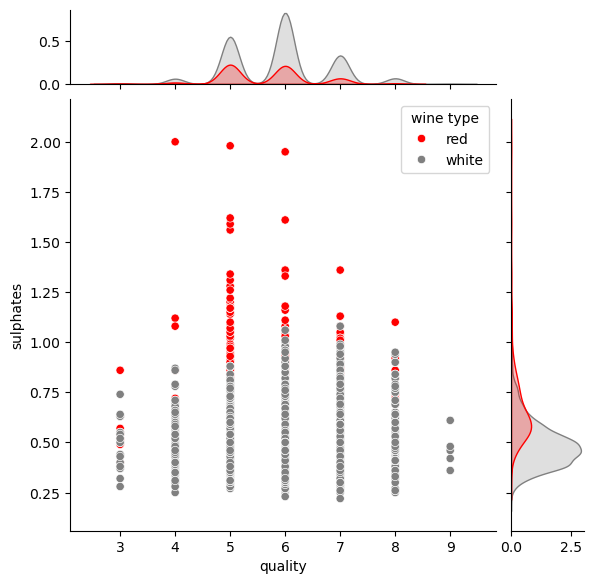

In [78]:
sns.jointplot (x= 'quality', y= 'sulphates',data= RW_Wine,color='red', marginal_ticks=True,hue='wine type',palette=custom_palette)

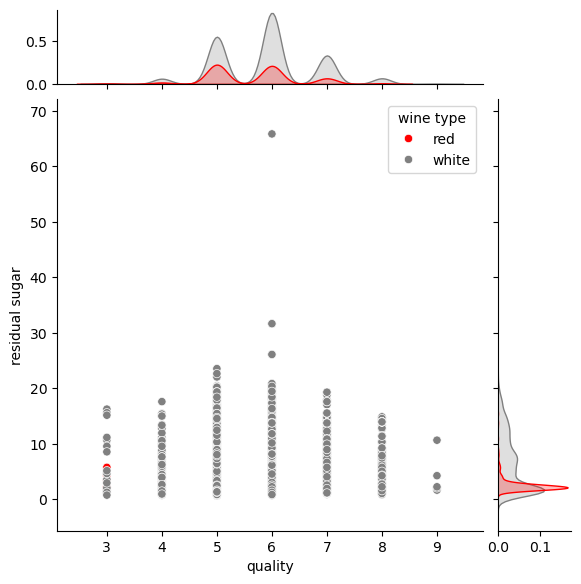

In [79]:
sns.jointplot (x= 'quality', y= 'residual sugar',data= RW_Wine,color='red', marginal_ticks=True,hue='wine type',palette=custom_palette)

In [80]:
from scipy import stats

F, p=stats.f_oneway(R_Wine[R_Wine['quality label'] == 'low']['alcohol'],
                    R_Wine[R_Wine['quality label'] == 'medium']['alcohol'],
                    R_Wine[R_Wine['quality label'] == 'high'] ['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
#print (p)
print('F Statistic:', F, '\tp-value:' , p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 205.23448800361507 	p-value: 4.776936653588672e-80
